# 3次元球面上の最適化 (ペナルティ項)

$\mathrm{argmin}_{\bf x \in \mathbb{R}^3} - x[2] + \gamma |(1-||x||_2)|$

In [1]:
%matplotlib notebook
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import torch
from torch.autograd import Variable

In [2]:
lr = 0.01
nb_epoch = 1000
γ = 1

In [3]:
init_x = np.random.randn(3)
init_x /= np.linalg.norm(init_x)

In [4]:
hist_penalty = []
x = Variable(torch.from_numpy(init_x.copy()), requires_grad=True)
for i in range(nb_epoch):
    hist_penalty.append(x.data.numpy().copy())
    loss = - x[2] + torch.abs(1-torch.dot(x,x)) * γ
    loss.backward()
    x.data -=  x.grad.data * lr
    x.grad.data.zero_()
hist_penalty = np.array(hist_penalty)
hist_penalty[-1]

array([  5.31967416e-05,   3.33191572e-05,   1.02169939e+00])

<IPython.core.display.Javascript object>


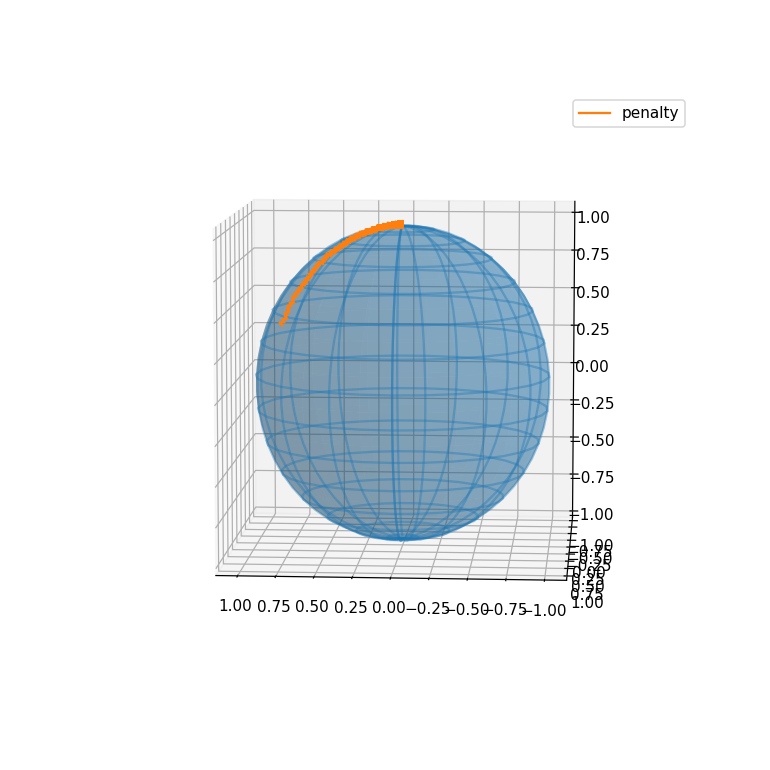

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))
ax.plot_surface(x, y, z, alpha=0.3)
ax.plot_wireframe(x, y, z, alpha=0.4, rstride=2, cstride=2)
ax.plot(hist_penalty[:,0], hist_penalty[:,1], hist_penalty[:,2], label="penalty")
plt.legend()
plt.show()